In [344]:
#import dependencies
import logging
from importlib import reload
logging = reload(logging)

#Create log file to store print log of each city's data
logging.basicConfig(level=logging.DEBUG,
                    format='%(asctime)s %(levelname)s %(message)s',
                    filename='city_weather.log',
                    filemode='a')
logging.warning('Log File Created')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import openweathermapy.core as owm
import requests
import time
from config import api_key

In [345]:
#Set query settings
settings = {"APPID": api_key, "units": "imperial"}

In [346]:
##Declare lists/vars
city_name = []
lat = []
lng = []
temps = []
humidity = []
cloudiness = []
wind_speed = []

In [347]:
#While loop goes through until 549 cities queried.
#Long and lat random numbers between X and Y (max value for each) to randomize cities.
#use OWM's 'find_cities_by_geo_coord' to find cities near randomized coords.

i = 0
while i < 550: 
    rand_lat= random.randint(-90, 90)
    rand_lng= random.randint(-180, 180)
    location = (rand_lat, rand_lng)
    data = owm.find_cities_by_geo_coord(location, 1, **settings)
    # sleep of 1.05 seconds between API attempts to self-rate limit
    time.sleep(1.05)
    if data != []:
        i += 1
        
        #Append data to relevant list. 
        #Truncate data to avoid printing commas/parens in the DF
        city_name.append(str(data.select(["name"]))[3:-4])
        lat.append(str(data.select(["coord.lat"]))[2:-3])
        lng.append(str(data.select(["coord.lon"]))[2:-3])
        temps.append(str(data.select(["main.temp"]))[2:-3])
        humidity.append(str(data.select(["main.humidity"]))[2:-3])
        cloudiness.append(str(data.select(["clouds.all"]))[2:-3])
        wind_speed.append(str(data.select(["wind.speed"]))[2:-3])
        
        logging.info(data.select(["name", "coord.lat", "coord.lon", "main.temp", "main.humidity", "clouds.all", "wind.speed"]))

    else:
        logging.warning("No city near random coordinates lat: " + str(rand_lat) + " lng: " + str(rand_lng))


In [348]:
#Create empty dataframe to store all desired output data
city_dict = { "City Name": city_name, "Latitude": lat, "Longitute": lng, "Temperature": temps, "Humidity": humidity,
             "Cloudiness": cloudiness, "Wind Speed": wind_speed}

city_data = pd.DataFrame(city_dict)
city_data

,City Name,Latitude,Longitute,Temperature,Humidity,Cloudiness,Wind Speed
0,Mossendjo,-2.9506,12.7261,71.36,96,64,2.59
1,Craiter,12.7731,45.0381,74.33,100,76,7.4
2,Kormista,40.9833,24.05,37.4,100,75,3.04
3,Espinosa,-14.9262,-42.8192,65.51,88,0,7.74
4,Ereencav,49.8807,115.7253,11.87,36,0,17.69
5,Newman,-23.3667,119.7333,100.4,24,40,12.75
6,Beringovskiy,63.05,179.3167,-0.37,100,80,7.74
7,Eynesil,41.0645,39.1438,41,60,0,3.36
8,Gadani,25.1185,66.7299,71.6,33,8,4.83
9,Wukari,7.85,9.7833,60.47,69,0,2.59


In [349]:
#debug statement
#city_data.dtypes

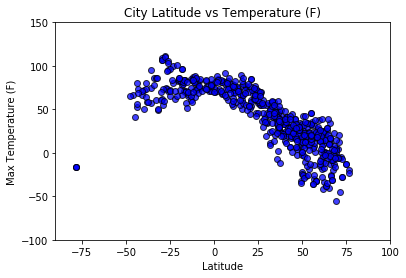

In [350]:
#Lat vs Temperature Scatter Plot
#convert data to float
city_data["Latitude"] = city_data.Latitude.astype(float)
city_data["Temperature"] = city_data.Temperature.astype(float)

#Set X, Y limits
x_limit = 100
plt.xlim(-90, x_limit)

y_limit = 150
plt.ylim(-100, y_limit)

#Set plot titles
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#Set plot title, execute plot, save image
plt.title("City Latitude vs Temperature (F)")
plt.scatter(city_data["Latitude"], city_data["Temperature"], marker="o", 
            facecolors="blue", edgecolors="black", alpha=0.75)
plt.savefig("TemperatureVsLatitude.png")

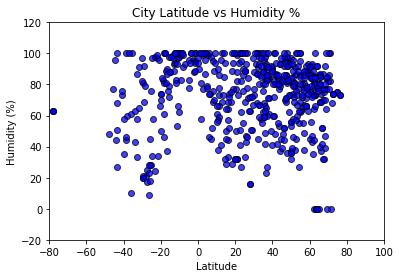

In [351]:
#Lat vs Humidity Scatter Plot
#Convert Humidity data to float
city_data["Humidity"] = city_data.Humidity.astype(int)

#Set X, Y limits
x_limit = 100
plt.xlim(-80, x_limit)
x_axis = (-80, x_limit)

y_limit = 120
plt.ylim(-20, y_limit)

#Set plot titles
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Set plot title, execute plot, save image
plt.title("City Latitude vs Humidity %")
plt.scatter(city_data["Latitude"], city_data["Humidity"], marker="o", 
            facecolors="blue", edgecolors="black", alpha=0.75 )
plt.savefig("HumidityVsLatitude.png")

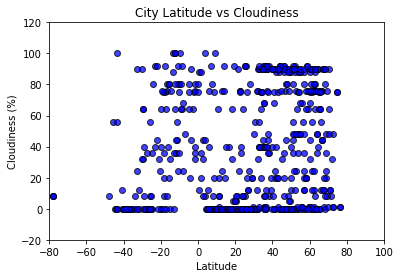

In [352]:
#Lat vs Cloudiness Scatter Plot
#Convert Cloudiness data to integer
city_data["Cloudiness"] = city_data.Cloudiness.astype(int)

#Set x, Y limits
x_limit = 100
plt.xlim(-80, x_limit)

y_limit = 120
plt.ylim(-20, y_limit)

#Set plot titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#Set plot title, execute plot, save image
plt.title("City Latitude vs Cloudiness")
plt.scatter(city_data["Latitude"], city_data["Cloudiness"], marker="o", 
            facecolors="blue", edgecolors="black", alpha=0.75 )
plt.savefig("CloudinessVsLatitude.png")

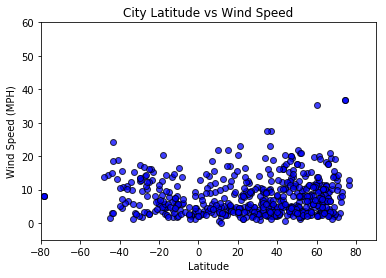

In [353]:
#Lat vs Wind Speed Scatter Plot
#Convert 'wind speed' DF column name to avoid spaces
city_data["Wind_Speed"] = city_data["Wind Speed"]
#Convert Wind_Speed data to float
city_data["Wind_Speed"] = city_data.Wind_Speed.astype(float)

#Set X, Y limits
x_limit = 90
plt.xlim(-80, x_limit)

y_limit = 60
plt.ylim(-5, y_limit)

#Set plot titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")

#Set plot title, execute plot, save image
plt.title("City Latitude vs Wind Speed")
plt.scatter(city_data["Latitude"], city_data["Wind_Speed"], marker="o", 
            facecolors="blue", edgecolors="black", alpha=0.75 )
plt.savefig("WindSpeedVsLatitude.png")